In [153]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [108]:
df = pd.read_csv('HW_gender.csv', index_col=False)[['Weight', 'Height']]
df = df.iloc[0:1000, :]

In [109]:
df.shape

(1000, 2)

In [110]:
df.head()

,Weight,Height
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


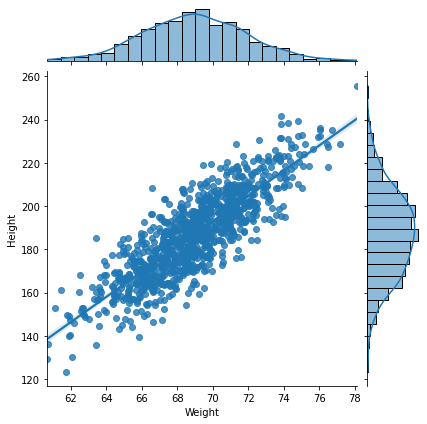

In [111]:
sns.jointplot(x=df['Weight'], y=df['Height'], data=df, kind='reg')

In [112]:
x_train, x_test, y_train, y_test = train_test_split(df['Weight'], df['Height'], test_size=0.2, random_state=42)
x_train = x_train.values.reshape((-1,1))
x_test = x_test.values.reshape((-1,1))
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))

print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (800, 1)
Test - Predictors shape (200, 1)
Train - Target shape (800, 1)
Test - Target shape (200, 1)


In [113]:
# same as hypothesis
def mse_calc(slope, intercept, x_train, y_train):
    tot_error = 0
    pred = []
    for i in range(len(x_train)):
        pred.append(((slope*x_train[i]) + intercept))
        tot_error += (y_train[i] - ((slope*x_train[i]) + intercept)) ** 2
        
    error = tot_error / float(len(x_train))
    return error, pred

In [114]:
#gradient descent 
def grad_descent(s_slope, s_intercept, l_rate, iter_val, x_train, y_train):
    theta_0_values = np.zeros(len(x_train))
    theta_1_values = np.zeros(len(x_train))
    for i in range(iter_val):
        int_slope = 0
        int_intercept = 0
        n_pt = float(len(x_train))
        
        for i in range(len(x_train)):
            int_slope += -(2/n_pt) * x_train[i] * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            theta_0_values[i] = int_slope
            
            int_intercept += -(2/n_pt) * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            theta_1_values[i] = int_intercept
            
        final_slope = s_slope - (l_rate * int_slope)
        final_intercept = s_intercept - (l_rate * int_intercept)
        s_slope = final_slope
        s_intercept = final_intercept
        
    return  s_slope, s_intercept, theta_0_values, theta_1_values

In [115]:
def rsq(prediction, y_test):
    total_data = len(prediction) 
    y_avg = np.sum(y_test)/total_data
    tot_err = np.sum((y_test-y_avg)**2)
    res_err = np.sum((y_test-prediction)**2)
    r2 = 1 - (res_err / tot_err)
    return r2

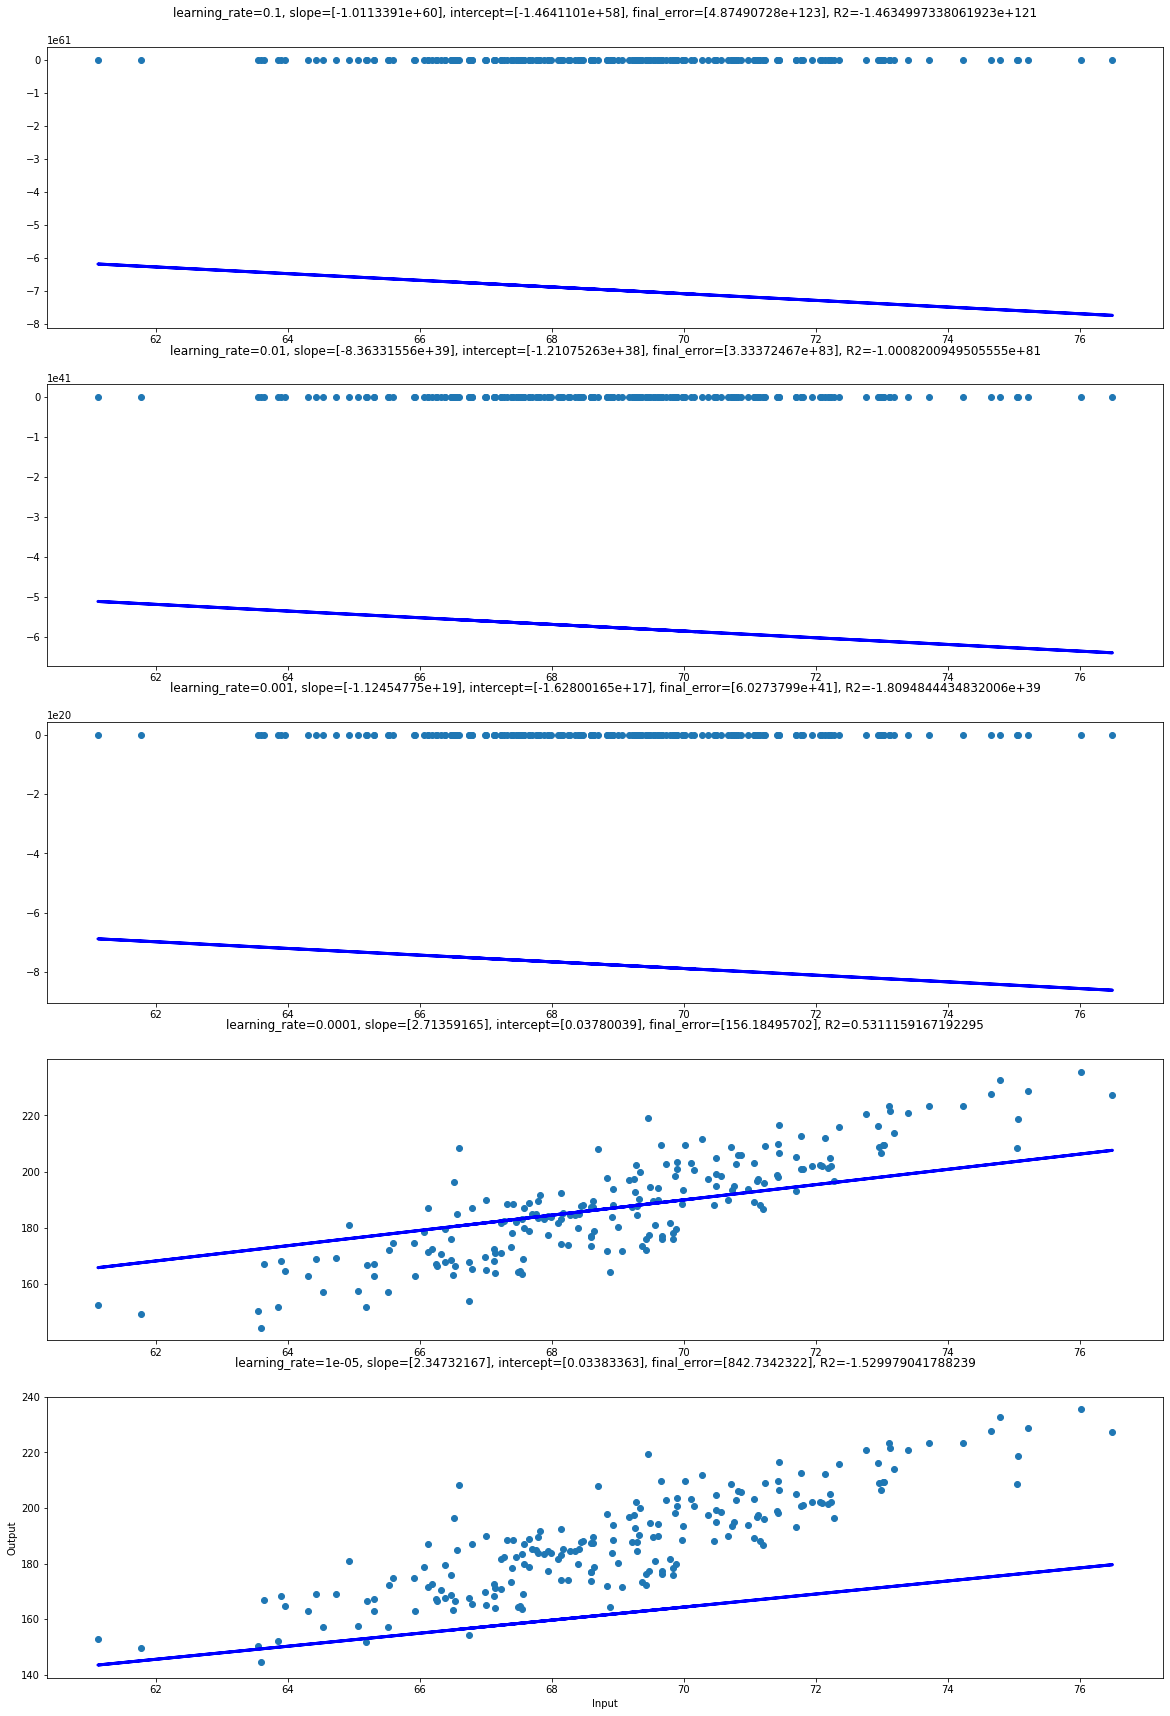

In [163]:
#defining slope and intercept value as 0 
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
start_slope = 0
start_intercept = 0
iteration = 20

f, ax = plt.subplots(5)
f.set_size_inches(20, 30)
plt.xlabel("Input")
plt.ylabel("Output")

for idx_lr, learning_rate in enumerate(learning_rates):
    grad_slope, grad_intercept, th0, th1 = grad_descent(start_slope, start_intercept, learning_rate, iteration, x_train, y_train)
    final_e_value, prediction = mse_calc(grad_slope, grad_intercept, x_test, y_test)
    r2_val = rsq(prediction, y_test)

#     print('Slope of the model', grad_slope)
#     print('Intercept of the model', grad_intercept)
#     print('Error value of the model', final_e_value)
#     print('R squared value', r2_val)

    ax[idx_lr].scatter(x_test, y_test)
    ax[idx_lr].plot(x_test, prediction, color='blue', linewidth = 3)
    ax[idx_lr].set_title('learning_rate={}, slope={}, intercept={}, final_error={}, R2={}'
                         .format(learning_rate, grad_slope, grad_intercept, final_e_value, r2_val), pad=30)